In [67]:
#Imports
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
import graphviz 
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import string
import numpy as np

In [109]:
#Data
corpus= pd.read_csv("../data/groundnews_corpus_cleaned.csv",index_col=0)
corpus.head()
set(corpus['owner_type'])

{'Corporation',
 'Government',
 'Independent',
 'Individual',
 'Media Conglomerate',
 'Other',
 'Private Equity',
 nan}

In [44]:
#Making Vectorizers
MyVect=CountVectorizer(input='content',
                        stop_words='english',
                        token_pattern='(?u)[a-zA-Z]+',
                        lowercase = True
                        )

MyVect_TFIDF=TfidfVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        lowercase = True,
                        #binary=True
                        )

In [115]:
#Converting the Ground News Data into a WDM
def create_wdm(corpus,index,cv):
    return pd.DataFrame(cv.fit_transform(corpus[index]).toarray(),columns=cv.get_feature_names_out())
count_wdm = create_wdm(corpus,'title_s',MyVect)
tfidf_wdm = create_wdm(corpus,'title_s',MyVect_TFIDF)
wdms=[count_wdm,tfidf_wdm]
bias={'Far Left':-3,'Left':-2,'Lean Left':-1,'Center':0,'Lean Right':1,'Right':2,'Far Right':3}
factuality={'Low Factuality':0,'Mixed Factuality':1,'High Factuality':2}
owner_type={'Other':-1,'Corporation':0,'Government':1,'Independent':2,'Individual':3,'Media Conglomerate':4,'Private Equity':5}
for wdm in wdms:
    wdm['bias']=corpus['bias'].map(bias).fillna(0)
    wdm['factuality']=corpus['factuality'].map(factuality).fillna(-1)
    wdm['owner_type']=corpus['owner_type'].map(owner_type).fillna(1)

In [116]:
#Creating Training and Testing Datasets.
rd.seed(1234)
TrainCount, TestCount = train_test_split(count_wdm, test_size=0.3)
TrainTFIDF, TestTFIDF = train_test_split(tfidf_wdm, test_size=0.3)

TrainCountLabels=TrainCount[['bias','owner_type','factuality']]
TrainTFIDFLabels=TrainTFIDF[['bias','owner_type','factuality']]
TestCountLabels=TestCount[['bias','owner_type','factuality']]
TestTFIDFLabels=TestTFIDF[['bias','owner_type','factuality']]

TrainCount=TrainCount.drop(['bias','owner_type','factuality'],axis=1)
TrainTFIDF=TrainTFIDF.drop(['bias','owner_type','factuality'],axis=1)
TestCount=TestCount.drop(['bias','owner_type','factuality'],axis=1)
TestTFIDF=TestTFIDF.drop(['bias','owner_type','factuality'],axis=1)

# Naive-Bayes Classification

In [117]:
#Create the modeler
MyModelNB= MultinomialNB()
preds=[]
## Run on both Dfs.................
for i in range(3):
    NB1=MyModelNB.fit(TrainCount, TrainCountLabels.iloc[:,i])
    preds += [MyModelNB.predict(TestCount)]
    
    NB2=MyModelNB.fit(TrainTFIDF, TrainTFIDFLabels.iloc[:,i])
    preds += [MyModelNB.predict(TestTFIDF)]


## confusion matrix
#from sklearn.metrics import confusion_matrix

## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many
matrices=[]
for i in range(3):
        print("\nThe confusion matrix is:")
        matrices+=[confusion_matrix(TestCountLabels.iloc[:,i], preds[2*i])]
        print(confusion_matrix(TestCountLabels.iloc[:,i], preds[2*i]))
        print("\nThe confusion matrix is:")
        matrices+=[confusion_matrix(TestTFIDFLabels.iloc[:,i], preds[2*i+1])]
        print(confusion_matrix(TestTFIDFLabels.iloc[:,i], preds[2*i+1]))


The confusion matrix is:
[[ 0  0  0  0  1  0]
 [ 1 22 10  2  2  0]
 [ 2 22 11  4  2  0]
 [ 0  2  5  2  2  0]
 [ 0  1  0  2  8  1]
 [ 0  0  0  1  2  0]]

The confusion matrix is:
[[ 0  1  2  0  0  0]
 [ 0 14 15  0  0  0]
 [ 0 28 15  1  0  0]
 [ 0  0 11  0  0  0]
 [ 0  7  3  1  3  0]
 [ 0  0  3  0  1  0]]

The confusion matrix is:
[[ 0  0  0  0  0  0]
 [ 1  5  4  5  6  0]
 [ 0  5  3  1  6  0]
 [ 0  5  1  6  6  0]
 [ 0  7  6 12 22  0]
 [ 0  3  0  1  0  0]]

The confusion matrix is:
[[ 0  1  0  0  1  0]
 [ 0  1  1  3 20  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0 16  0]
 [ 0  1  3  1 43  0]
 [ 0  0  0  1  1  0]]

The confusion matrix is:
[[ 0  0  4  0]
 [ 0  2  5  1]
 [ 3  6 18  4]
 [ 0  2 10 50]]

The confusion matrix is:
[[ 0  0  1  1]
 [ 0  0  5  5]
 [ 0  0 19 13]
 [ 0  0  5 56]]


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

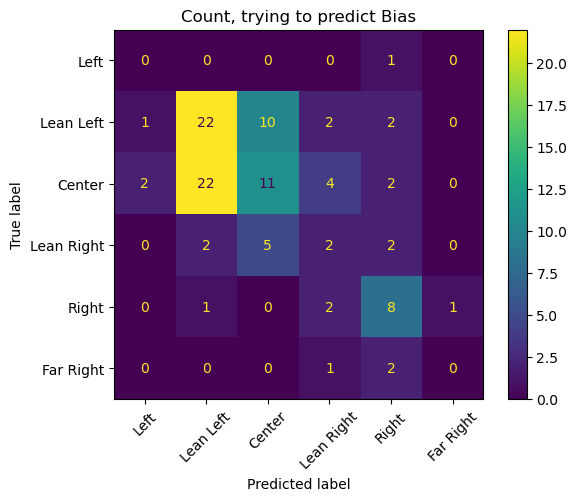

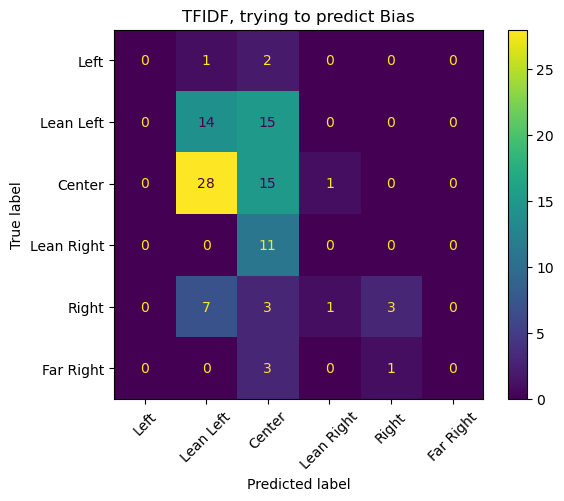

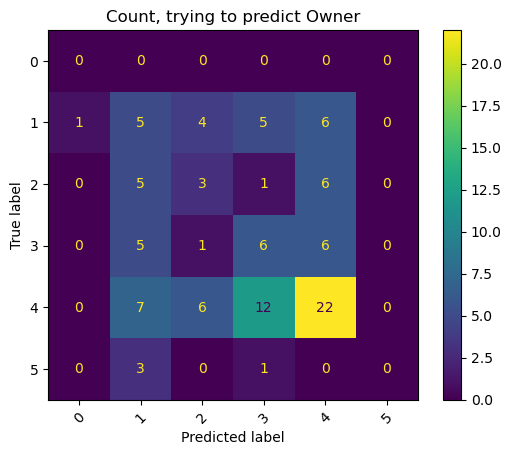

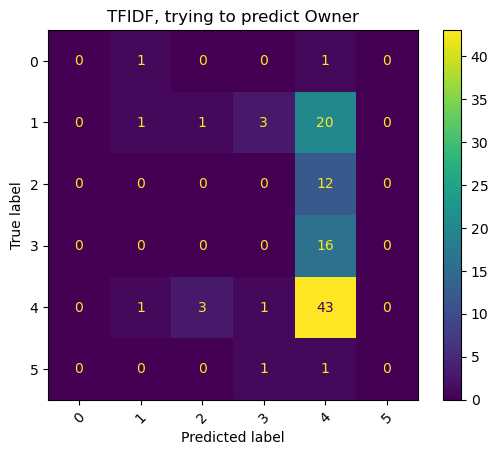

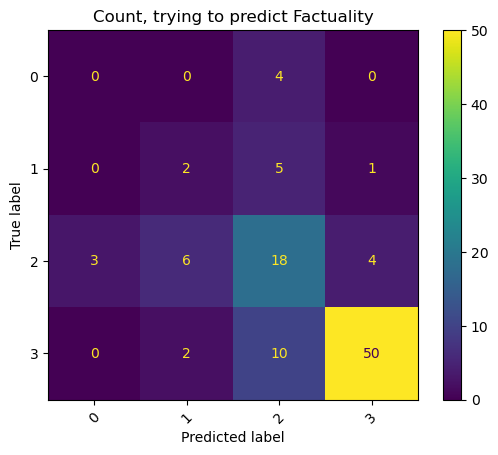

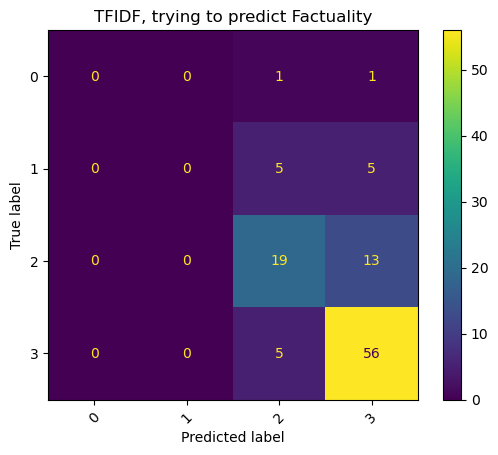

In [121]:
ConfusionMatrixDisplay(confusion_matrix = matrices[0], 
                                            display_labels = ["Left","Lean Left","Center","Lean Right","Right","Far Right"]).plot()
plt.title("Count, trying to predict Bias")
plt.xticks(rotation=45)
    
ConfusionMatrixDisplay(confusion_matrix = matrices[1], 
                                            display_labels = ["Left","Lean Left","Center","Lean Right","Right","Far Right"]).plot()
plt.title("TFIDF, trying to predict Bias")
plt.xticks(rotation=45)

ConfusionMatrixDisplay(confusion_matrix = matrices[2]
                       #, display_labels = ['Corporation','Government','Independent','Individual','Media Conglomerate','Other','Private Equity']
                      ).plot()
plt.title("Count, trying to predict Owner")
plt.xticks(rotation=45)
    
ConfusionMatrixDisplay(confusion_matrix = matrices[3]
                       #, display_labels = ['Corporation','Government','Independent','Individual','Media Conglomerate','Other','Private Equity']
                      ).plot()
plt.title("TFIDF, trying to predict Owner")
plt.xticks(rotation=45)

ConfusionMatrixDisplay(confusion_matrix = matrices[4]
                       #, display_labels = ['High Factuality', 'Low Factuality', 'Mixed Factuality']
                      ).plot()
plt.title("Count, trying to predict Factuality")
plt.xticks(rotation=45)
    
ConfusionMatrixDisplay(confusion_matrix = matrices[5]
                       #,display_labels = ['High Factuality', 'Low Factuality', 'Mixed Factuality']
                      ).plot()
plt.title("TFIDF, trying to predict Factuality")
plt.xticks(rotation=45)